In [1]:
import pandas as pd
import numpy as np

## $Timestamp -Object$
Time stamps reference particular moments in time (e.g., Oct 24th, 2022 at 7:00pm)

## $Creating -Timestamp -Objects$

In [2]:
# creating a timestamp
type(pd.Timestamp('2023/1/5')) #year-month-date

pandas._libs.tslibs.timestamps.Timestamp

In [3]:
# variations
pd.Timestamp('2023/1/5')

Timestamp('2023-01-05 00:00:00')

In [4]:
pd.Timestamp('2023-1-5')

Timestamp('2023-01-05 00:00:00')

In [5]:
pd.Timestamp('2023, 1, 5')

Timestamp('2023-01-05 00:00:00')

In [6]:
# only year
pd.Timestamp('2023')

Timestamp('2023-01-01 00:00:00')

In [7]:
# using text
pd.Timestamp('5th January 2023')

Timestamp('2023-01-05 00:00:00')

In [11]:
# providing time also
pd.Timestamp('5th January 2023 9:21AM')

Timestamp('2023-01-05 09:21:00')

In [10]:
pd.Timestamp('2023/1/5/9/21')

ValueError: could not convert string to Timestamp

In [ ]:
# AM and PM

In [12]:
# using datetime.datetime object
import datetime as dt
x = pd.Timestamp(dt.datetime(2023,1,5,9,21,56))
x

Timestamp('2023-01-05 09:21:56')

In [14]:
# fetching attributes
x.year
x.month
x.day
x.hour
x.minute
x.second

56

In [ ]:
# why separate objects to handle data and time when python already has datetime functionality?

* syntax wise datetime is very convenient
* But the performance takes a hit while working with huge data. List vs Numpy Array
* The weaknesses of Python's datetime format inspired the NumPy team to add a set of native time series data type to NumPy.
* The datetime64 dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly.

In [15]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [16]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

* Because of the uniform type in NumPy datetime64 arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's datetime objects, especially as arrays get large

* Pandas Timestamp object combines the ease-of-use of python datetime with the efficient storage and vectorized interface of numpy.datetime64

* From a group of these Timestamp objects, Pandas can construct a DatetimeIndex that can be used to index data in a Series or DataFrame

## DatetimeIndex Object
A collection of pandas timestamp

In [18]:
# from strings
pd.DatetimeIndex(['2023/1/1','2022/1/1','2021/1/1'])

DatetimeIndex(['2023-01-01', '2022-01-01', '2021-01-01'], dtype='datetime64[ns]', freq=None)

In [ ]:
type(pd.DatetimeIndex(['2023/1/1','2022/1/1','2021/1/1']))

In [22]:
type(pd.DatetimeIndex(['2023/1/1','2022/1/1','2021/1/1'])[0])

pandas._libs.tslibs.timestamps.Timestamp

In [20]:
# using python datetime object
pd.DatetimeIndex([dt.datetime(2023,1,1),dt.datetime(2022,1,1),dt.datetime(2021,1,1)])

DatetimeIndex(['2023-01-01', '2022-01-01', '2021-01-01'], dtype='datetime64[ns]', freq=None)

In [23]:
# using pd.timestamps
dt_index = pd.DatetimeIndex([pd.Timestamp(2023,1,1),pd.Timestamp(2022,1,1),pd.Timestamp(2021,1,1)])

In [24]:
# using datatimeindex as series index
pd.Series([1,2,3],index=dt_index)

2023-01-01    1
2022-01-01    2
2021-01-01    3
dtype: int64

### date_range function

In [25]:
# generate daily dates in a given range
pd.date_range(start='2023/1/5',end='2023/2/28')  

DatetimeIndex(['2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29', '2023-01-30', '2023-01-31', '2023-02-01',
               '2023-02-02', '2023-02-03', '2023-02-04', '2023-02-05',
               '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09',
               '2023-02-10', '2023-02-11', '2023-02-12', '2023-02-13',
               '2023-02-14', '2023-02-15', '2023-02-16', '2023-02-17',
               '2023-02-18', '2023-02-19', '2023-02-20', '2023-02-21',
               '2023-02-22', '2023-02-23', '2023-02-24', '2023-02-25',
               '2023-02-26', '2023-02-27', '2023-02-28'],
              dtype

In [27]:
# alternate days in a given range
pd.date_range(start='2023/1/5',end='2023/2/28',freq='3D') #default value is D

DatetimeIndex(['2023-01-05', '2023-01-08', '2023-01-11', '2023-01-14',
               '2023-01-17', '2023-01-20', '2023-01-23', '2023-01-26',
               '2023-01-29', '2023-02-01', '2023-02-04', '2023-02-07',
               '2023-02-10', '2023-02-13', '2023-02-16', '2023-02-19',
               '2023-02-22', '2023-02-25', '2023-02-28'],
              dtype='datetime64[ns]', freq='3D')

In [28]:
# B -> business days
pd.date_range(start='2023/1/5',end='2023/2/28',freq='B') # Dates which comes in between monday and friday

DatetimeIndex(['2023-01-05', '2023-01-06', '2023-01-09', '2023-01-10',
               '2023-01-11', '2023-01-12', '2023-01-13', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-23', '2023-01-24', '2023-01-25', '2023-01-26',
               '2023-01-27', '2023-01-30', '2023-01-31', '2023-02-01',
               '2023-02-02', '2023-02-03', '2023-02-06', '2023-02-07',
               '2023-02-08', '2023-02-09', '2023-02-10', '2023-02-13',
               '2023-02-14', '2023-02-15', '2023-02-16', '2023-02-17',
               '2023-02-20', '2023-02-21', '2023-02-22', '2023-02-23',
               '2023-02-24', '2023-02-27', '2023-02-28'],
              dtype='datetime64[ns]', freq='B')

In [29]:
# W -> one week per day
pd.date_range(start='2023/1/5',end='2023/2/28',freq='W-THU')  #default is sunday

DatetimeIndex(['2023-01-05', '2023-01-12', '2023-01-19', '2023-01-26',
               '2023-02-02', '2023-02-09', '2023-02-16', '2023-02-23'],
              dtype='datetime64[ns]', freq='W-THU')

In [30]:
# H -> Hourly data(factor)
pd.date_range(start='2023/1/5',end='2023/2/28',freq='H')

DatetimeIndex(['2023-01-05 00:00:00', '2023-01-05 01:00:00',
               '2023-01-05 02:00:00', '2023-01-05 03:00:00',
               '2023-01-05 04:00:00', '2023-01-05 05:00:00',
               '2023-01-05 06:00:00', '2023-01-05 07:00:00',
               '2023-01-05 08:00:00', '2023-01-05 09:00:00',
               ...
               '2023-02-27 15:00:00', '2023-02-27 16:00:00',
               '2023-02-27 17:00:00', '2023-02-27 18:00:00',
               '2023-02-27 19:00:00', '2023-02-27 20:00:00',
               '2023-02-27 21:00:00', '2023-02-27 22:00:00',
               '2023-02-27 23:00:00', '2023-02-28 00:00:00'],
              dtype='datetime64[ns]', length=1297, freq='H')

In [31]:
pd.date_range(start='2023/1/5',end='2023/2/28',freq='6H')

DatetimeIndex(['2023-01-05 00:00:00', '2023-01-05 06:00:00',
               '2023-01-05 12:00:00', '2023-01-05 18:00:00',
               '2023-01-06 00:00:00', '2023-01-06 06:00:00',
               '2023-01-06 12:00:00', '2023-01-06 18:00:00',
               '2023-01-07 00:00:00', '2023-01-07 06:00:00',
               ...
               '2023-02-25 18:00:00', '2023-02-26 00:00:00',
               '2023-02-26 06:00:00', '2023-02-26 12:00:00',
               '2023-02-26 18:00:00', '2023-02-27 00:00:00',
               '2023-02-27 06:00:00', '2023-02-27 12:00:00',
               '2023-02-27 18:00:00', '2023-02-28 00:00:00'],
              dtype='datetime64[ns]', length=217, freq='6H')

In [32]:
# M -> Month end
pd.date_range(start='2023/1/5',end='2023/2/28',freq='M')

DatetimeIndex(['2023-01-31', '2023-02-28'], dtype='datetime64[ns]', freq='M')

In [33]:
# MS -> Month start
pd.date_range(start='2023/1/5',end='2023/2/28',freq='MS')

DatetimeIndex(['2023-02-01'], dtype='datetime64[ns]', freq='MS')

In [34]:
# A -> Year end
pd.date_range(start='2023/1/5',end='2030/2/28',freq='A')

DatetimeIndex(['2023-12-31', '2024-12-31', '2025-12-31', '2026-12-31',
               '2027-12-31', '2028-12-31', '2029-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [35]:
# using periods(number of results)
pd.date_range(start='2023/1/5',periods=25,freq='D')

DatetimeIndex(['2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29'],
              dtype='datetime64[ns]', freq='D')

## to_datetime function
converts an existing objects to pandas timestamp/datetimeindex object

In [36]:
# simple series example
s = pd.Series(['2023/1/1','2022/1/1','2021/1/1'])
pd.to_datetime(s)

0   2023-01-01
1   2022-01-01
2   2021-01-01
dtype: datetime64[ns]

In [38]:
pd.to_datetime(s).dt.day_name()

0      Sunday
1    Saturday
2      Friday
dtype: object

In [40]:
pd.to_datetime(s).dt.year

0    2023
1    2022
2    2021
dtype: int64

In [41]:
pd.to_datetime(s).dt.month

0    1
1    1
2    1
dtype: int64

In [42]:
pd.to_datetime(s).dt.month_name()

0    January
1    January
2    January
dtype: object

In [43]:
# with errors
s = pd.Series(['2023/1/1','2022/1/1','2021/130/1'])
s

0      2023/1/1
1      2022/1/1
2    2021/130/1
dtype: object

In [44]:
pd.to_datetime(s)

ParserError: Unknown string format: 2021/130/1 present at position 2

In [46]:
pd.to_datetime(s,errors='coerce')

0   2023-01-01
1   2022-01-01
2          NaT
dtype: datetime64[ns]

In [47]:
pd.to_datetime(s,errors='coerce').dt.year

0    2023.0
1    2022.0
2       NaN
dtype: float64

In [48]:
df = pd.read_csv('expense_data.csv')
df.shape

(277, 11)

In [49]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [58]:
pd.to_datetime(df['Date'])

0     2022-03-02 10:11:00
1     2022-03-02 10:11:00
2     2022-03-01 19:50:00
3     2022-03-01 18:56:00
4     2022-03-01 18:22:00
              ...        
272   2021-11-22 14:16:00
273   2021-11-22 14:16:00
274   2021-11-21 17:07:00
275   2021-11-21 15:50:00
276   2021-11-21 13:30:00
Name: Date, Length: 277, dtype: datetime64[ns]

In [50]:
df['Date'] = pd.to_datetime(df['Date'])

In [59]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,Wednesday
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,Wednesday
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,Tuesday
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,Tuesday
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,Tuesday


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


## dt accessor
Accessor object for datetimelike properties of the Series values.

In [52]:
df['Date'].dt.is_quarter_start

0      False
1      False
2      False
3      False
4      False
       ...  
272    False
273    False
274    False
275    False
276    False
Name: Date, Length: 277, dtype: bool

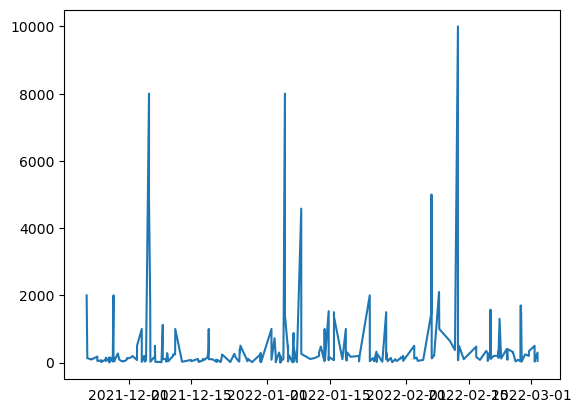

In [53]:
# plot graph
import matplotlib.pyplot as plt
plt.plot(df['Date'],df['INR'])

In [54]:
# day name wise bar chart/month wise bar chart
df['day_name'] = df['Date'].dt.day_name()

In [55]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,Wednesday
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,Wednesday
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,Tuesday
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,Tuesday
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,Tuesday


<Axes: xlabel='day_name'>

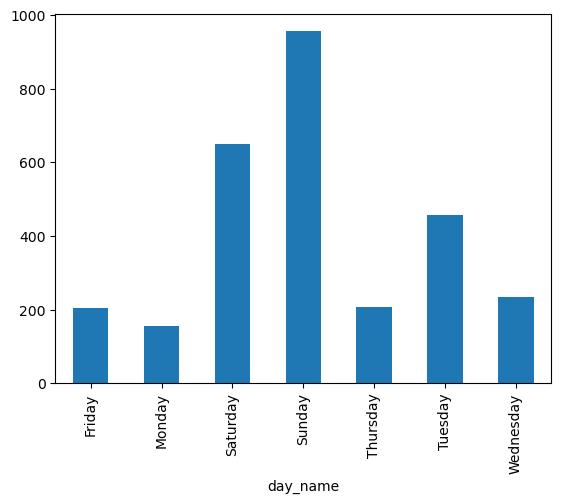

In [56]:
df.groupby('day_name')['INR'].mean().plot(kind='bar')

In [57]:
df[df['Date'].dt.is_month_end]

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name
7,2022-02-28 11:56:00,CUB - online payment,Food,NaN,Pizza,339.15,Expense,NaN,339.15,INR,339.15,Monday
8,2022-02-28 11:45:00,CUB - online payment,Other,NaN,From kumara,200.00,Income,NaN,200.00,INR,200.00,Monday
61,2022-01-31 08:44:00,CUB - online payment,Transportation,NaN,Vnr to apk,50.00,Expense,NaN,50.00,INR,50.00,Monday
62,2022-01-31 08:27:00,CUB - online payment,Other,NaN,To vicky,200.00,Expense,NaN,200.00,INR,200.00,Monday
63,2022-01-31 08:26:00,CUB - online payment,Transportation,NaN,To ksr station,153.00,Expense,NaN,153.00,INR,153.00,Monday
242,2021-11-30 14:24:00,CUB - online payment,Gift,NaN,Bharath birthday,115.00,Expense,NaN,115.00,INR,115.00,Tuesday
243,2021-11-30 14:17:00,CUB - online payment,Food,NaN,Lunch with company,128.00,Expense,NaN,128.00,INR,128.00,Tuesday
244,2021-11-30 10:11:00,CUB - online payment,Food,NaN,Breakfast,70.00,Expense,NaN,70.00,INR,70.00,Tuesday
